/Users/nathankarst/anaconda/envs/py2k_gis/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Threshold: 40000
Total number of REW IDs used: 37
Total number of unique REW group(s): 37

	Total number of solved hillslopes: 37
Threshold: 20000
Total number of REW IDs used: 37
Total number of unique REW group(s): 37



KeyboardInterrupt: 

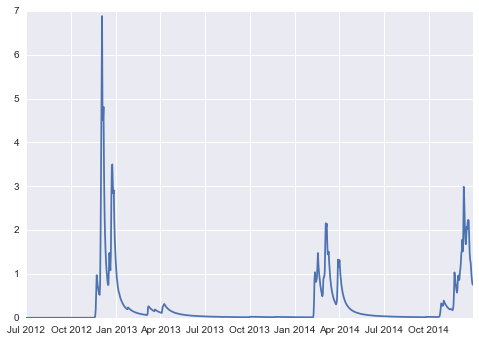

In [1]:
%matplotlib inline
import pandas as pd
import gdal
import os
import numpy as np
import fiona
import shapely
from shapely import geometry
from os.path import dirname
import glob
import sys
import pickle
from functools import partial
import geopandas as gp
from matplotlib import pyplot as plt
import seaborn as sns

parent_dir = dirname(dirname(os.getcwd()))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','lib'))
import zonal_stats as zs
import meteolib as meteo
import evaplib as evap

sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','1_data_preparation'))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','2_hillslope_discharge'))
sys.path.append(os.path.join(parent_dir,'StreamflowTempModel','3_channel_routing'))

import prism_forcing as forcing
import prep
import hillslope_discharge

discharges = {}
for i in range(2):
    thresh = 40000/2**i
    
    print('Threshold: '+str(thresh))
    
    os.system('./../1_data_preparation/extract_stream_basins_topology_standalone.sh ' + str(thresh) + ' ../..')
    prep.main()
    forcing.main()
    hillslope_discharge.main()

    discharge = pickle.load(open( os.path.join(parent_dir,'model_data','solved_hillslope_discharge.p'), "rb" ))
    rew_config = pickle.load(open(os.path.join(parent_dir,'model_data','rew_config.p'), "rb" ))        

    print('\tTotal number of solved hillslopes: '+str(len(discharge.keys())))
    
    outletREWId = [rew_id for rew_id,value in rew_config.items() if value['next_stream']==-1][0]
    outletGroup = rew_config[outletREWId]['group']

    discharges[i] = discharge[outletGroup]

    plt.plot(discharge[outletGroup]['discharge'],label=str(thresh))
    
plt.legend()